In [ ]:
pip install scikit-learn opencv-python numpy matplotlib


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
def load_data(data_dir, image_size=(128, 128)):
    X, y = [], []
    label_map = {'Normal': 0, 'Osteopenia': 1, 'Osteoporosis': 2}

    for label_name, label in label_map.items():
        class_path = os.path.join(data_dir, label_name)
        for filename in os.listdir(class_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                img_path = os.path.join(class_path, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, image_size)
                    X.append(img.flatten())  # Flatten to 1D
                    y.append(label)

    return np.array(X), np.array(y)

In [ ]:
#dataset folder
data_dir = "/content/drive/MyDrive/OS Collected Data"
X, y = load_data(data_dir)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 4. Train the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = svm_model.predict(X_test)

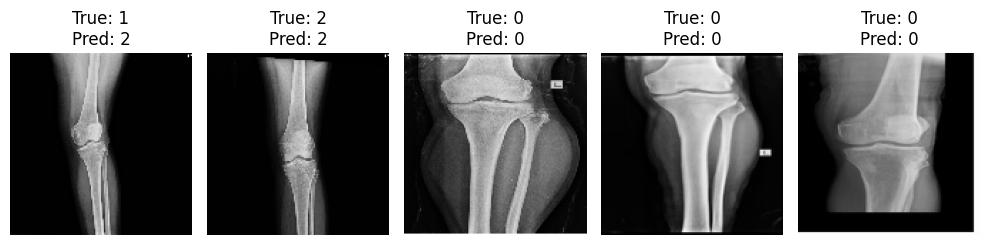

In [ ]:
# 6. Plot sample results
plt.figure(figsize=(10, 4))
for i in range(5):
    idx = np.random.randint(0, len(X_test))
    img = X_test[idx].reshape(128, 128)
    plt.subplot(1, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Initialize the model with SVM (hinge loss)
model = SGDClassifier(loss='hinge', max_iter=1, learning_rate='constant', eta0=0.01, warm_start=True)

epochs = 10
train_accuracies = []
test_accuracies = []

for epoch in range(epochs):
    model.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch+1}/{epochs} - Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Epoch 1/10 - Train Acc: 0.6754, Test Acc: 0.6080


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Epoch 2/10 - Train Acc: 0.6676, Test Acc: 0.6222


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Epoch 3/10 - Train Acc: 0.7173, Test Acc: 0.6562


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Epoch 4/10 - Train Acc: 0.7656, Test Acc: 0.6932


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Epoch 5/10 - Train Acc: 0.8146, Test Acc: 0.7614


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Epoch 6/10 - Train Acc: 0.7784, Test Acc: 0.7244


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Epoch 7/10 - Train Acc: 0.8594, Test Acc: 0.7756


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Epoch 8/10 - Train Acc: 0.8622, Test Acc: 0.7812


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Epoch 9/10 - Train Acc: 0.8700, Test Acc: 0.8097


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Epoch 10/10 - Train Acc: 0.8885, Test Acc: 0.7784


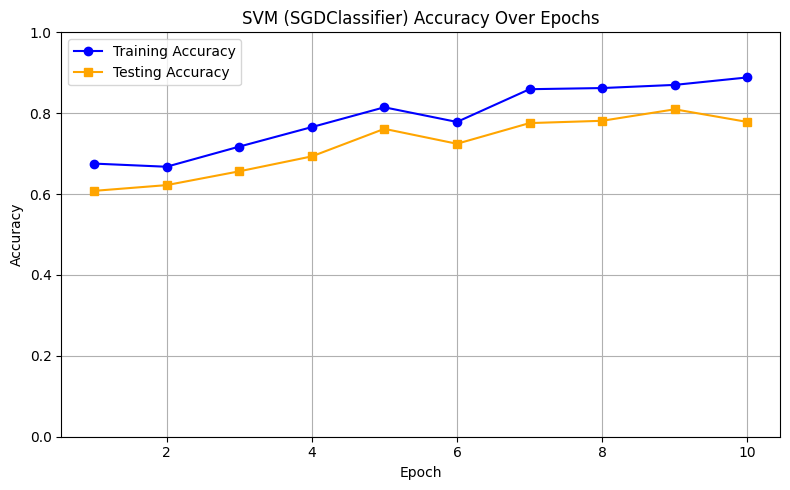

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have lists:
# train_accuracies = [acc1, acc2, ..., accN]
# test_accuracies = [acc1, acc2, ..., accN]

epochs = range(1, len(train_accuracies) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accuracies, marker='o', label='Training Accuracy', color='blue')
plt.plot(epochs, test_accuracies, marker='s', label='Testing Accuracy', color='orange')
plt.title("SVM (SGDClassifier) Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


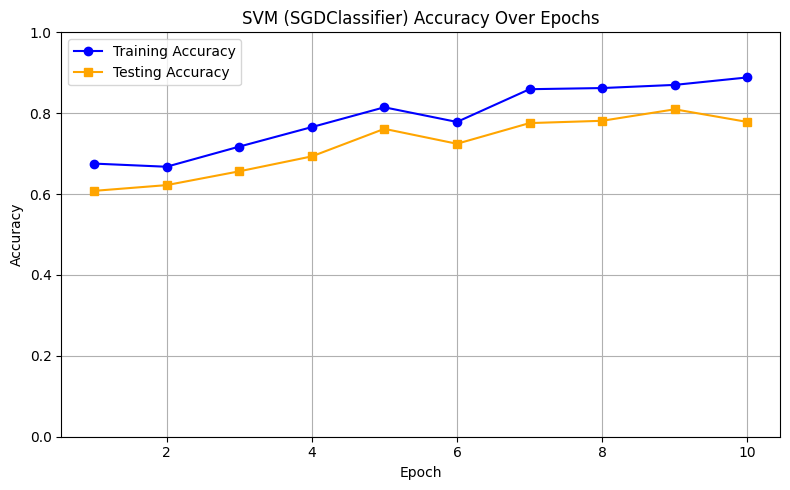

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have lists:
# train_accuracies = [acc1, acc2, ..., accN]
# test_accuracies = [acc1, acc2, ..., accN]

epochs = range(1, len(train_accuracies) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accuracies, marker='o', label='Training Accuracy', color='blue')
plt.plot(epochs, test_accuracies, marker='s', label='Testing Accuracy', color='orange')
plt.title("SVM (SGDClassifier) Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Osteopenia', 'Osteoporosis']))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      Normal       0.93      0.89      0.91       152
  Osteopenia       0.91      0.79      0.85        66
Osteoporosis       0.84      0.93      0.88       134

    accuracy                           0.89       352
   macro avg       0.89      0.87      0.88       352
weighted avg       0.89      0.89      0.89       352

Confusion Matrix:
[[136   2  14]
 [  4  52  10]
 [  7   3 124]]


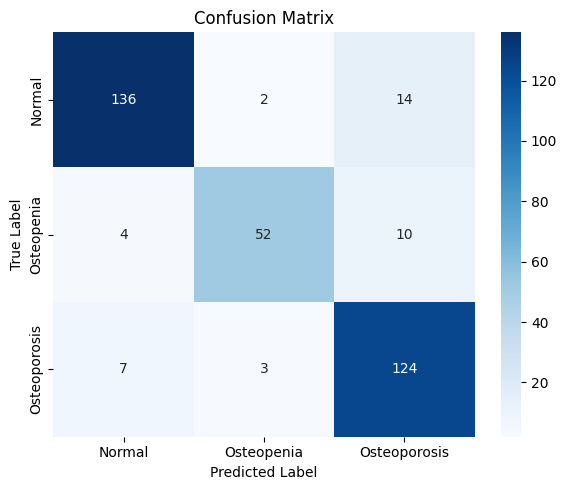

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
labels = ['Normal', 'Osteopenia', 'Osteoporosis']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


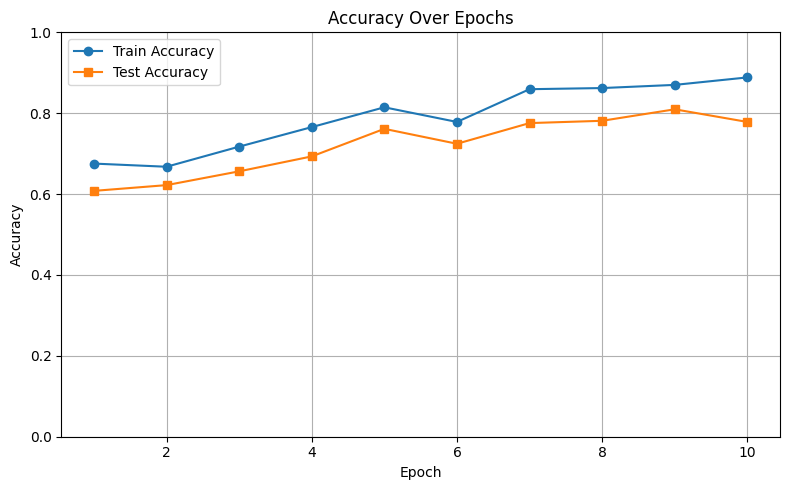

In [ ]:
epochs = range(1, len(train_accuracies) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(epochs, test_accuracies, marker='s', label='Test Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
